In [1]:
# librairies de base
import pandas as pd
import numpy as np
import re
import os
pd.options.mode.chained_assignment = None
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
# librairies de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import decomposition, preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# librairies de dataviz
import seaborn as sns
import missingno as msno
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
from matplotlib.collections import LineCollection
import matplotlib.path as path
from matplotlib.patches import Circle
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns; sns.set_theme()
from functions import *

In [4]:
# Option d'affichage
pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)

In [5]:
# Chargement des données
data = pd.read_csv('cleaned_dataset.csv')

In [6]:
data = data.drop(["Unnamed: 0"],axis=1)

In [7]:
data = data.rename(columns={'pnns_groups_2':'categories'})
data = data.rename(columns={'pnns_groups_1':'categories_ACP'})

*Définition du type de variables.*

In [8]:
data.columns = data.columns.str.replace('_100g','')

In [9]:
# catégorielle
cat = []
# numérique
num = []

for col in data.columns:
    if data[col].dtype == 'object':
        cat.append(col)
    else:
        num.append(col)

In [10]:
data["nutriscore_num"]=data['nutrition_grade_fr'].apply(convertion_alpha_score)

In [11]:
data["nutrition_grade_fr"] = data["nutrition_grade_fr"].str.upper()

# 1. Analyse univariée

## 1.2. Catégorielles

## Groupes

Text(0, 0.5, 'Categories')

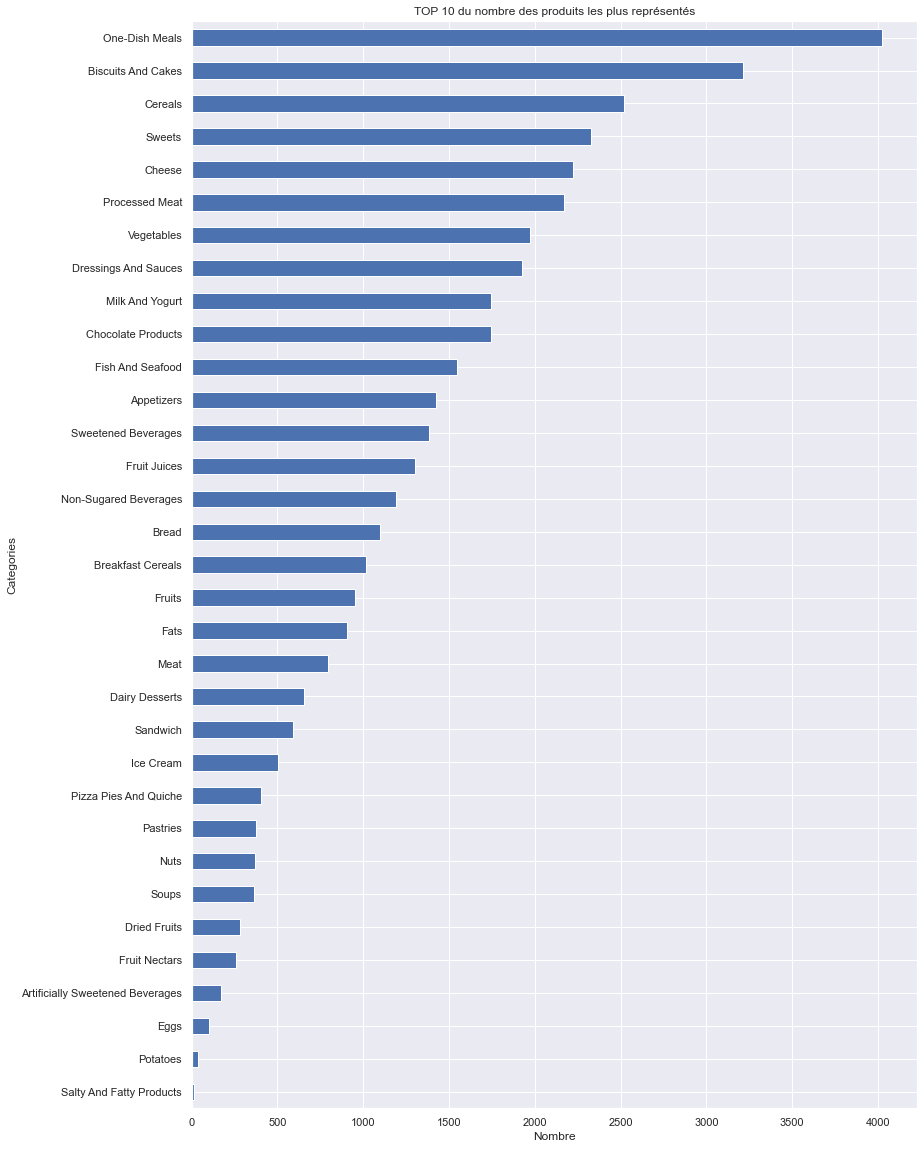

In [12]:
# Nombre de produits par catégories en ordre décroissant
cat_plot = data.groupby(by='categories')['categories'].agg('count').sort_values(ascending=True)
cat_plot.plot(kind='barh', figsize=(13,20), title = 'TOP 10 du nombre des produits les plus représentés')
plt.xlabel("Nombre")
plt.ylabel("Categories")

Text(0, 0.5, 'Categories')

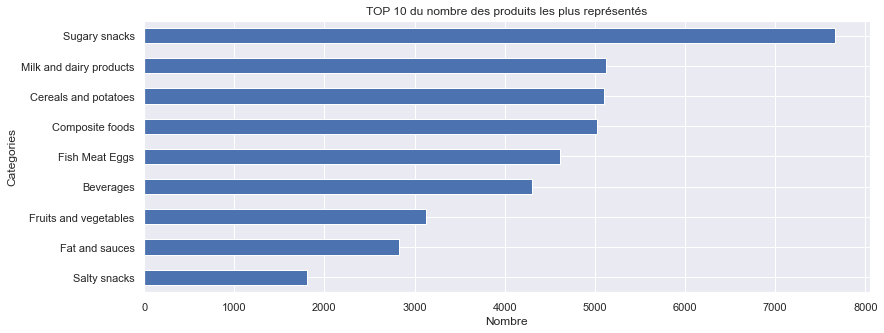

In [13]:
# Nombre de produits par catégories en ordre décroissant
cat_2_plot = data.groupby(by='categories_ACP')['categories_ACP'].agg('count').sort_values(ascending=True)
cat_2_plot.plot(kind='barh', figsize=(13,5), title = 'TOP 10 du nombre des produits les plus représentés')
plt.xlabel("Nombre")
plt.ylabel("Categories")

**NOTE** : *On remarque une sur-représentation des catégries d'en-cas, produits sucrés, desserts, gâteaux et autres produits industriels / transformés que l'on peut considérer comme mauvais pour la santé.*

In [14]:
data[num].describe()

,nutrition_score_fr,energy,carbohydrates,proteins,fat,saturated_fat,sugars,fiber,sodium
count,39603.000000,39603.000000,39603.000000,39603.000000,39603.000000,39603.000000,39603.000000,39603.000000,39603.000000
mean,8.383330,1095.490839,27.139272,7.642953,13.253073,5.349446,12.741853,2.094803,0.341982
std,9.071744,781.967476,26.847240,7.300449,16.827790,8.341322,18.357663,3.145921,0.699573
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,0.000000
25%,1.000000,402.500000,4.300000,1.600000,1.265000,0.300000,1.000000,0.285714,0.027559
50%,8.000000,1005.000000,14.100000,6.000000,6.800000,1.900000,4.000000,1.297064,0.224409
75%,15.000000,1644.000000,52.000000,11.000000,21.000000,7.400000,15.600000,2.700000,0.472441
max,40.000000,3767.400000,100.000000,86.000000,100.000000,100.000000,100.000000,86.200000,83.000000


In [15]:
data[cat].describe()

,product_name,categories,categories_ACP,nutrition_grade_fr
count,39603,39603,39603,39603
unique,32723,33,9,5
top,Huile d'olive vierge extra,One-Dish Meals,Sugary snacks,D
freq,38,4026,7663,10924


## Nutriscore

In [16]:
label = ['A','B','C','D','E']
color= ['darkgreen', 'yellowgreen', 'gold','darkorange','orangered']
colorlabel = dict(zip(color,label))
labelcolor = dict(zip(label,color))

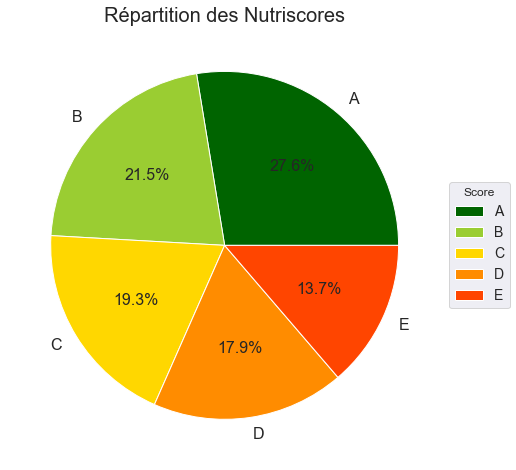

In [17]:
plt.figure(figsize=(8,8))
plt.title('Répartition des Nutriscores', size=20)
wedges, texts, autotexts = plt.pie(data.nutrition_grade_fr.value_counts().values,labels = label,autopct='%1.1f%%',textprops={'fontsize': 16},colors=colorlabel)
plot = plt.gca()
plot.legend(wedges, label,title="Score",loc="center left",fontsize=14,bbox_to_anchor=(1, 0, 0.5, 1))

**NOTE** : *Si on regarde la répartition des produits par nutriscore, c'est l'inverse ; les produits ayant un mauvais nutriscore sous sous-représentés. Il manque néanmoins une variable prix pour compléter l'analyse catégorielle des nutriscores.*

## Produits

Text(0, 0.5, 'Produits')

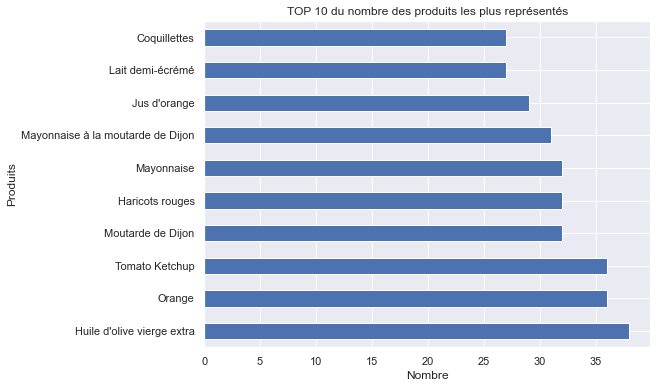

In [18]:
# Vraiment pertinent ? Pas vrmt rpz de l'ensemble des produits
Figure2 = data.groupby(by='product_name')['categories'].agg('count').sort_values(ascending=False).head(10)
Figure2.plot(kind='barh', figsize=(8,6), title = 'TOP 10 du nombre des produits les plus représentés')
plt.xlabel("Nombre")
plt.ylabel("Produits")

**NOTE** : *Cette méthode de comptabilisation des produits les plus présents a ses limites. En effet dès que la dénomination d'un produit identique varie d'un caractère, il n'est pas comptabilisé comme une unité supplémentaire.*

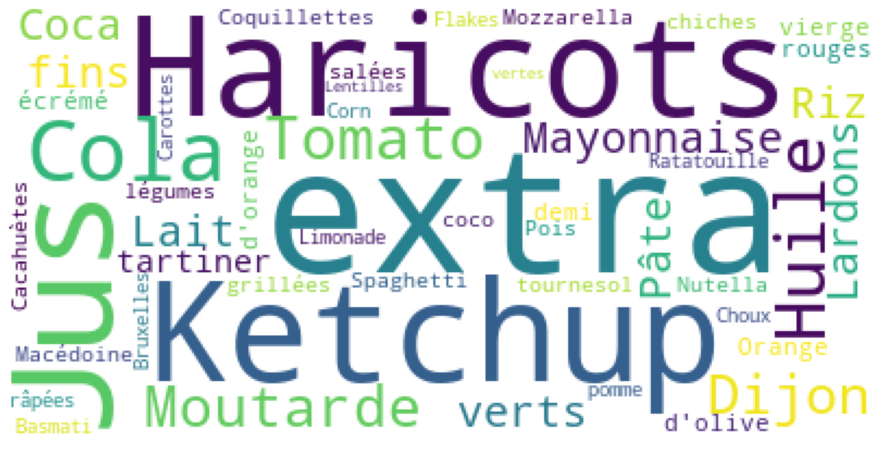

In [19]:
# Vraiment pertinent ? Pas vrmt rpz de l'ensemble des produits
# Utiliser plutot un str.contains ?
from wordcloud import WordCloud
text = ",".join(mot for mot in data.groupby(by='product_name')['categories'].agg('count').sort_values(ascending=False).head(50).reset_index()['product_name'].tolist())
exclure_mots = ['d', 'du', 'de', 'la', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(text)
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 1.3 Test de normalité

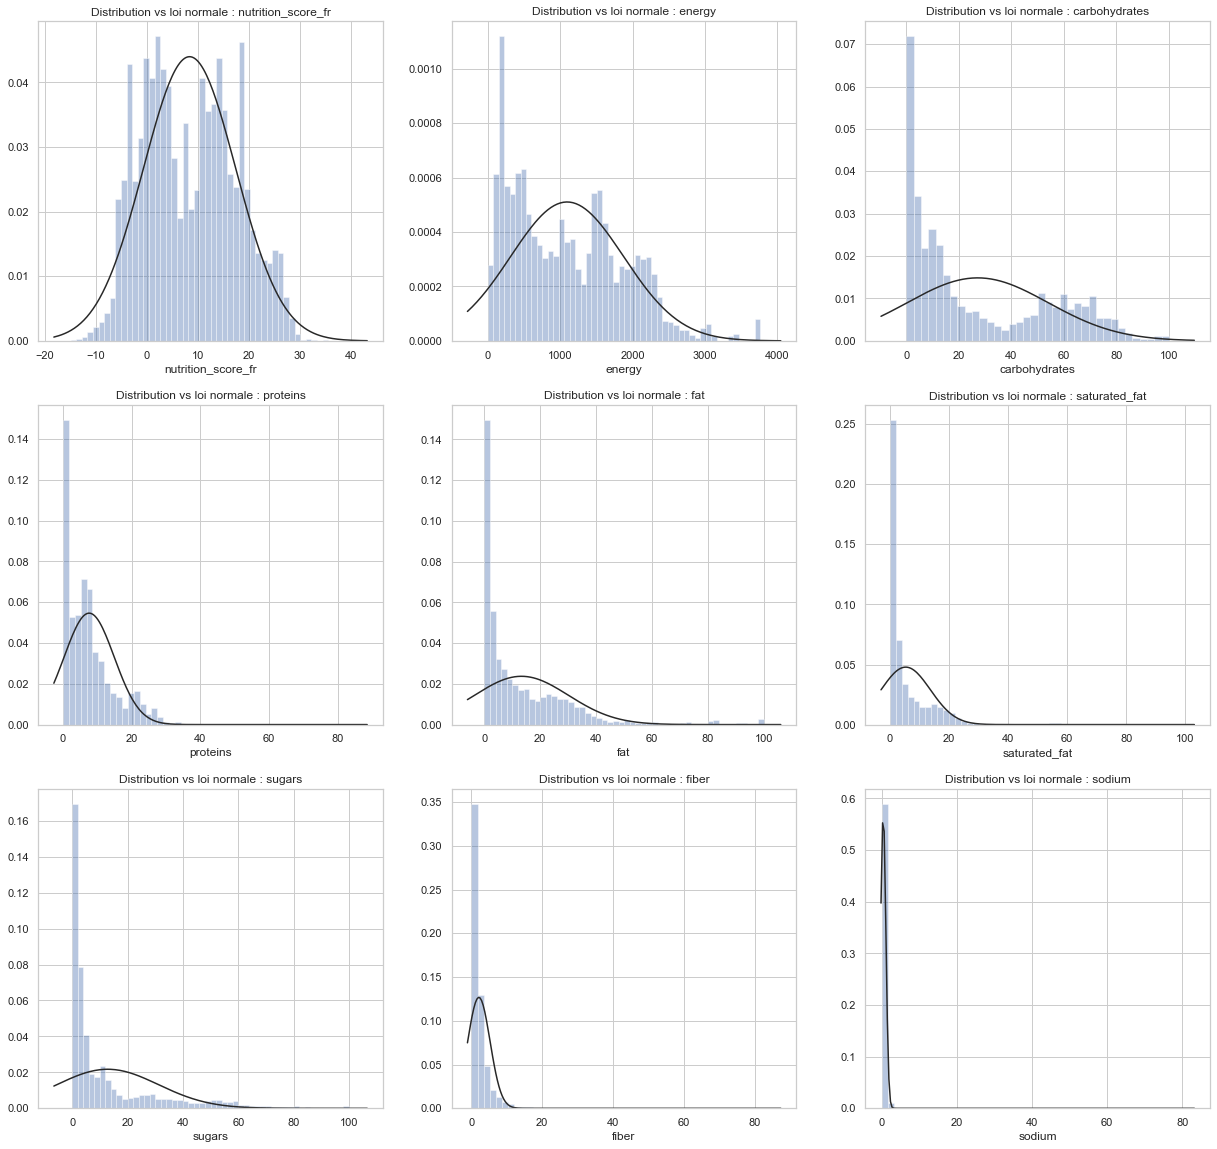

In [20]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))
sub = 0
for i in range(len(num[:])):
    fig.add_subplot(3,3,i+1)
    colonne = num[i]
    kstest = stats.kstest(data[colonne].notnull(),'norm')
    ax = sns.distplot(data[colonne],fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    sub += 1
plt.show()

**NOTE** : *En comparant la distribution de chaque variable à une répartition théorique normale, on constate qu'aucune distribution ne suit de loi normale. En l'état nous ne pouvons donc pas réaliser d'ANOVA. Nous allons donc procéder à au test non-paramétrique de KRUSKAL-WALLIS.*

In [21]:
# Conduct the Kruskal-Wallis Test 
print('for all values:\n',stats.kruskal(data.nutriscore_num, data.nutrition_score_fr,data.energy,data.carbohydrates,data.proteins,data.fat,data.saturated_fat,data.sugars,data.fiber,data.sodium),'\n')

for value in num:
    print(value,':\n',stats.kruskal(data.nutriscore_num, data[value]),'\n')

data = data.drop(['nutriscore_num'],axis=1)

for all values:
 KruskalResult(statistic=184330.6783130073, pvalue=0.0) 

nutrition_score_fr :
 KruskalResult(statistic=5204.909603968492, pvalue=0.0) 

energy :
 KruskalResult(statistic=58770.95780824263, pvalue=0.0) 

carbohydrates :
 KruskalResult(statistic=19631.69516646623, pvalue=0.0) 

proteins :
 KruskalResult(statistic=7075.484263664947, pvalue=0.0) 

fat :
 KruskalResult(statistic=4431.419281286671, pvalue=0.0) 

saturated_fat :
 KruskalResult(statistic=1695.2793054203707, pvalue=0.0) 

sugars :
 KruskalResult(statistic=1183.027094540296, pvalue=2.978563296179685e-259) 

fiber :
 KruskalResult(statistic=14730.093625490566, pvalue=0.0) 

sodium :
 KruskalResult(statistic=56688.91193461469, pvalue=0.0) 



**NOTE** : *Cette version non-paramétrique de l'ANOVA se base sur des échantillons indépendants, non-normaux et des variables catégorielles ordinales (ici le nutrigrade). Comme la p-value est inférieure à 0.05 pour chaque variable, la moyenne des valeurs centrale est différente, donc pour chaque variable, on peut affirmer que le nutriscore influe significativement sur chacune des variables numérique.*

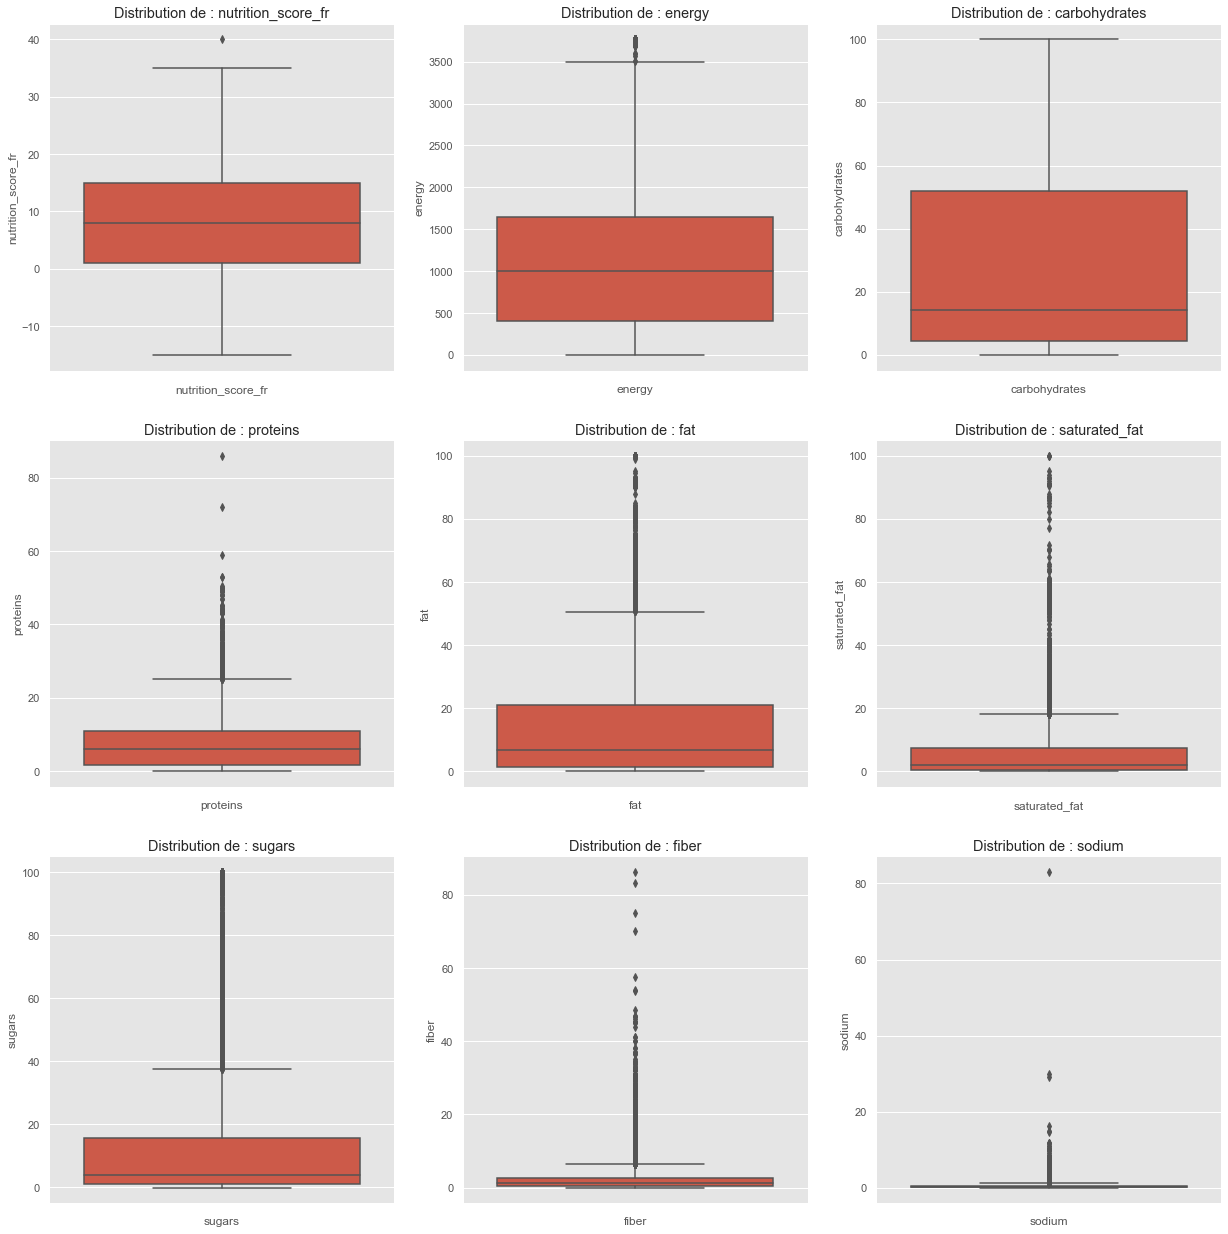

In [22]:
# Graphique en boite à moustache pour chaque les variables numériques
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,60))
sub = 0
for i in range(len(num[:9])):
    fig.add_subplot(8,3,i+1)
    colonne = num[i]
    ax = sns.boxplot(y=colonne,data=data)
    chaine = 'Distribution de : ' + colonne
    plt.title(chaine)
    plt.xlabel(colonne)
    sub += 1
plt.show()
sns.set(font_scale=1)

**NOTE** : *On remarque pour chaque variable que les valeurs sont réparties sur l'ensemble des positions possible (à part pour les fibres et les protéines). Les macronutriments ont une répartition très hétérogène; 75% des produits ont entre **5 et 55g de glucides**, entre **3 et 22g de lipides** pour 100g et entre **3 et 15g de protéines**. La plupart des produits ont entre **0 et 5g de micronutriments** acide gras saturé et fibre, et entre **0 à 17g de fibre**, ce qui s'explique par la surreprésentation des glucides dans l'alimentation et des fibres dans les fruits et légumes. À l'inverse il est logique de ne retrouver que peu de protéines puisqu'ils sont principalement présents dans les viandes et poissons. Enfin concernant les calories, il est tout à fait logique de retrouver une médiane à **1000kJ** et 75% des produits entre **400kJ et 1700kJ** puisque les glucides et les fibres sont sur-représentés, et qu'ils ont tous un faible indice glycémique. Les produits contenant principalement des lipides sont largement minoritaires, et le seuil pour 100g de glucides ou de protéines est de **1674kJ**.*

# 2. Analyse bivariée

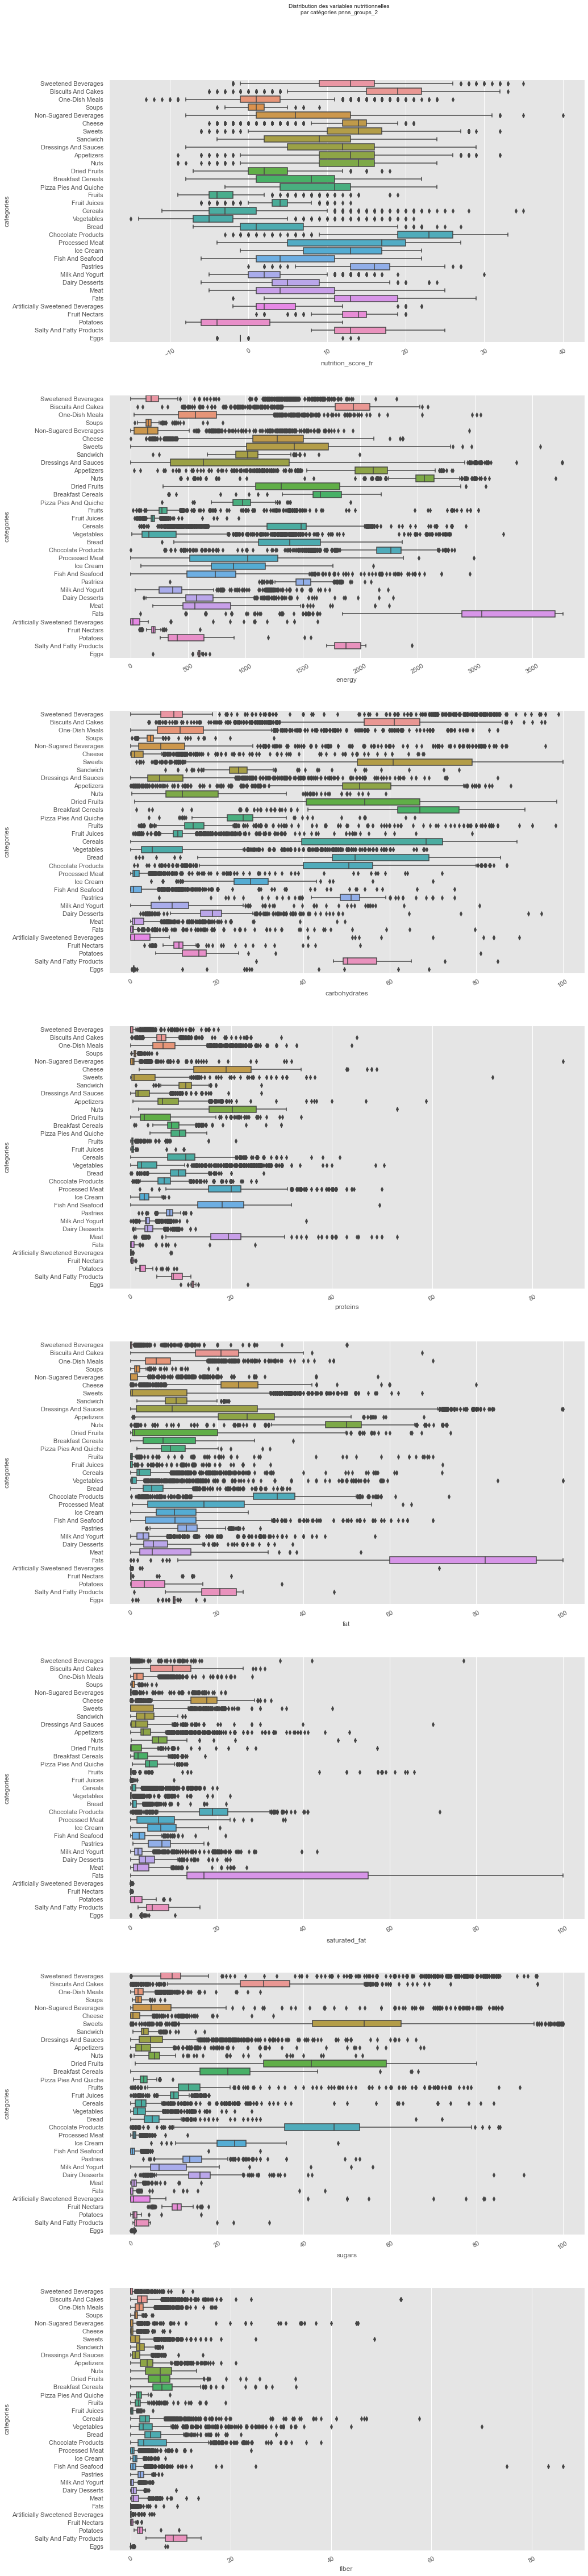

In [23]:
# boxplot par catégorie et par variable
plt.style.use('ggplot')
fig = plt.figure(figsize=(15,80))
sub = 0
for i in range(len(num[:8])):
    fig.add_subplot(8,1,i+1)
    colonne = num[i]
    ax = sns.boxplot(y="categories", x=colonne, data=data[data["categories"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_2", ha="center")
plt.show()

**NUTRISCORE** : *Sans surprise, on constate que les produits ayant **le meilleur nutriscore** sont les fruits et légumes, et **les plus mauvais** sont les produits chocolatés, biscuits, gâteaux, les matières grasses et la viande transformée. Cependant on remarque quelques 'surprises' ; certaines boissons non sucrées ont **les pires taux de nutriscore**, tout comme les certaines céréales. À l'inverse certains plats préparés ont **parmi les meilleurs nutriscore**. On remarque aussi que les oeufs, qui n'ont pas de raison d'osciller, vont de -5 à 15. Enfin les produits ayant le plus large spectre de nutriscore sont les apéritifs, les céréales, les boissons non-sucrées et les gâteaux.*

**ENERGIE** : *Les produits les plus caloriques sont ceux ayant les plus hauts taux de gras et le plus grand indice glycémique, à l'image des matières grasses et des fruits et légumes qui sont aux deux extrèmes.*

**GLUCIDES** : *Concernant les glucides, ont remarque que la quasi totalité des catégories en possède à l'exception des oeufs, matières grasses, viandes et des boissons alcoolisées qui n'en possède que rarement et peu. Les produits en possédant le plus sont les friandises, condiments et sauces, céréales, gâteaux et apéritifs. Le fait que les fruits et légumes en possède peu s'explique par un indice glycémique très faible.*

**PROTÉINES** : *Très peu de surprises sur les protéines, les catégories surreprésentées sont les viandes, les fromages, certains légumes et les oléagineux. Cependant on remarque certaines valeurs atypiques dans les friandises et boissons non-sucrées qui doivent être des produits riche en protéine pour sportifs.*

**LIPIDES** : *Ici les produits possédant des huiles et matières grasses sont très vite surreprésentés, à l'image des sauces et condiments, apéritifs, oléagineux et produits transformés / plats préparés.*

**ACIDES GRAS SATURÉS** : *L'analyse est presque équivalente que pour les lipides, a quelques exceptions près. En effet, on remarque que certains produits chocolatés, boissons sucrées et fruits sont très riches en acides gras saturés (en plus des sauces, condiments et matières grasses).*

**SUCRES** : *Pour 75% des produits qui composent la plupart des catégories, les sucres sont peu présents. Cependant il existe des valeurs atypiques hautes dans beaucoup de catégories comme les desserts lactés, boissons sucrées, produits chocolatés, pains, céréales, fruits, friandises, biscuits et gâteaux.*

**FIBRES** : *Pour l'ensemble des catégories, le 3 quarts des produits ne dépassent pas les 16g pour 100g d'aliments. Les produits aux valeurs atypiques les plus hautes sont plutôt étonnantes en dehors des céréales, biscuits et gâteaux. On voit notamment les boissons non-sucrées, friandises et les poissons et fruits de mer. On pourrait presque considérer comme abérrant le légume possédant 60g de fibres pour 100g, étant donné le faible indice glycémique qu'il est censé avoir.*

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='categories'>

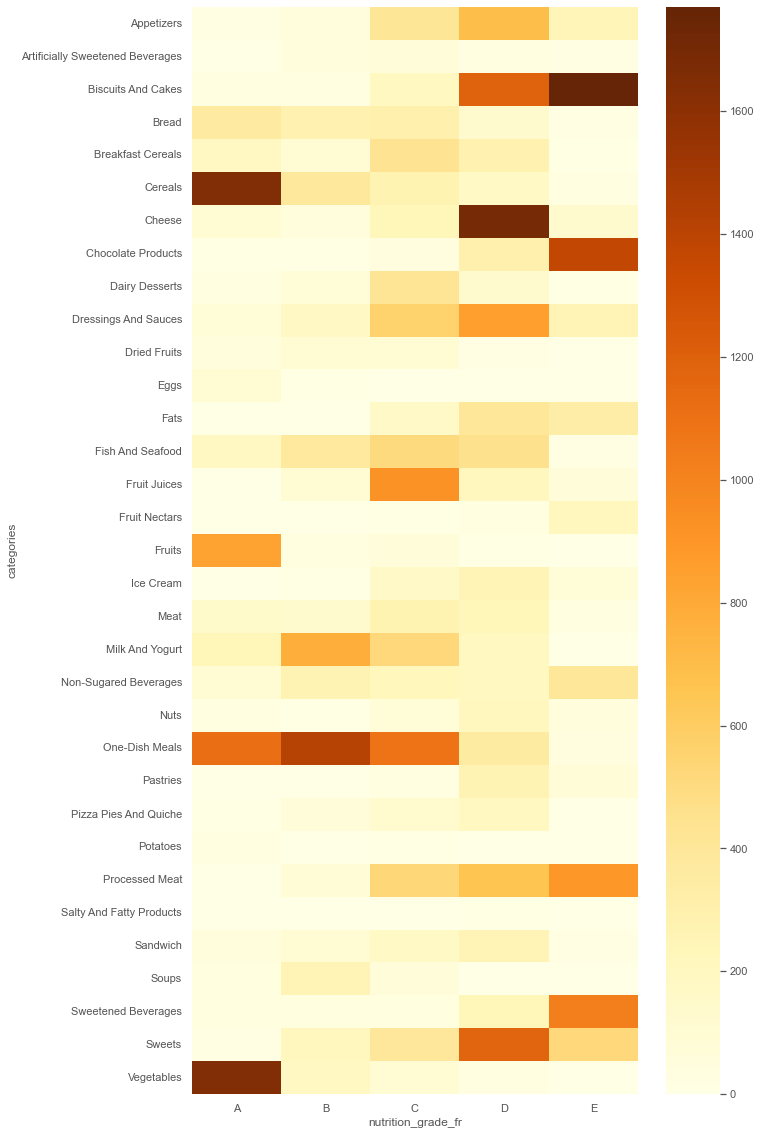

In [24]:
# Heatmap du nombre de produits pour chaque catégorie et chaque nutrigrade
score_vs_cat = data[['categories','nutrition_grade_fr']].pivot_table(index='categories',columns='nutrition_grade_fr', aggfunc='size').fillna(0).astype(int)
plt.figure(figsize=[10,20])
sns.heatmap(score_vs_cat,cmap="YlOrBr")

**NOTE** : *Ici apparait clairement les catégories ayant les meilleurs nutrigrade, à savoir les fruits et légumes, oeufs, céréales et plats préparés. Les boissons alcoolisées sont majoritairement associées à un score de B, les fromages à D et les chocolats à E. Cette heatmap permet de confirmer les observations précédentes, à savoir que les biscuits et gâteaux, boissons sucrées, friandises, matières grasses, pâtisseries, nectars de fruits, sauces, glaces sont pour la plupart mauvais pour la santé (score entre C et E). Il faut néanmoins mettre en exergue le fait que la heatmap priorise les catégories ayant le plus de produits, et donc lorsqu'une catégorie n'a pas beaucoup de produits il est difficile de savoir où le nutrigrade est majoritaire, à l'instar des fruits, produits sucrés, pommes de terres et boissons sucrées artificiellement.*

<Figure size 720x2880 with 0 Axes>

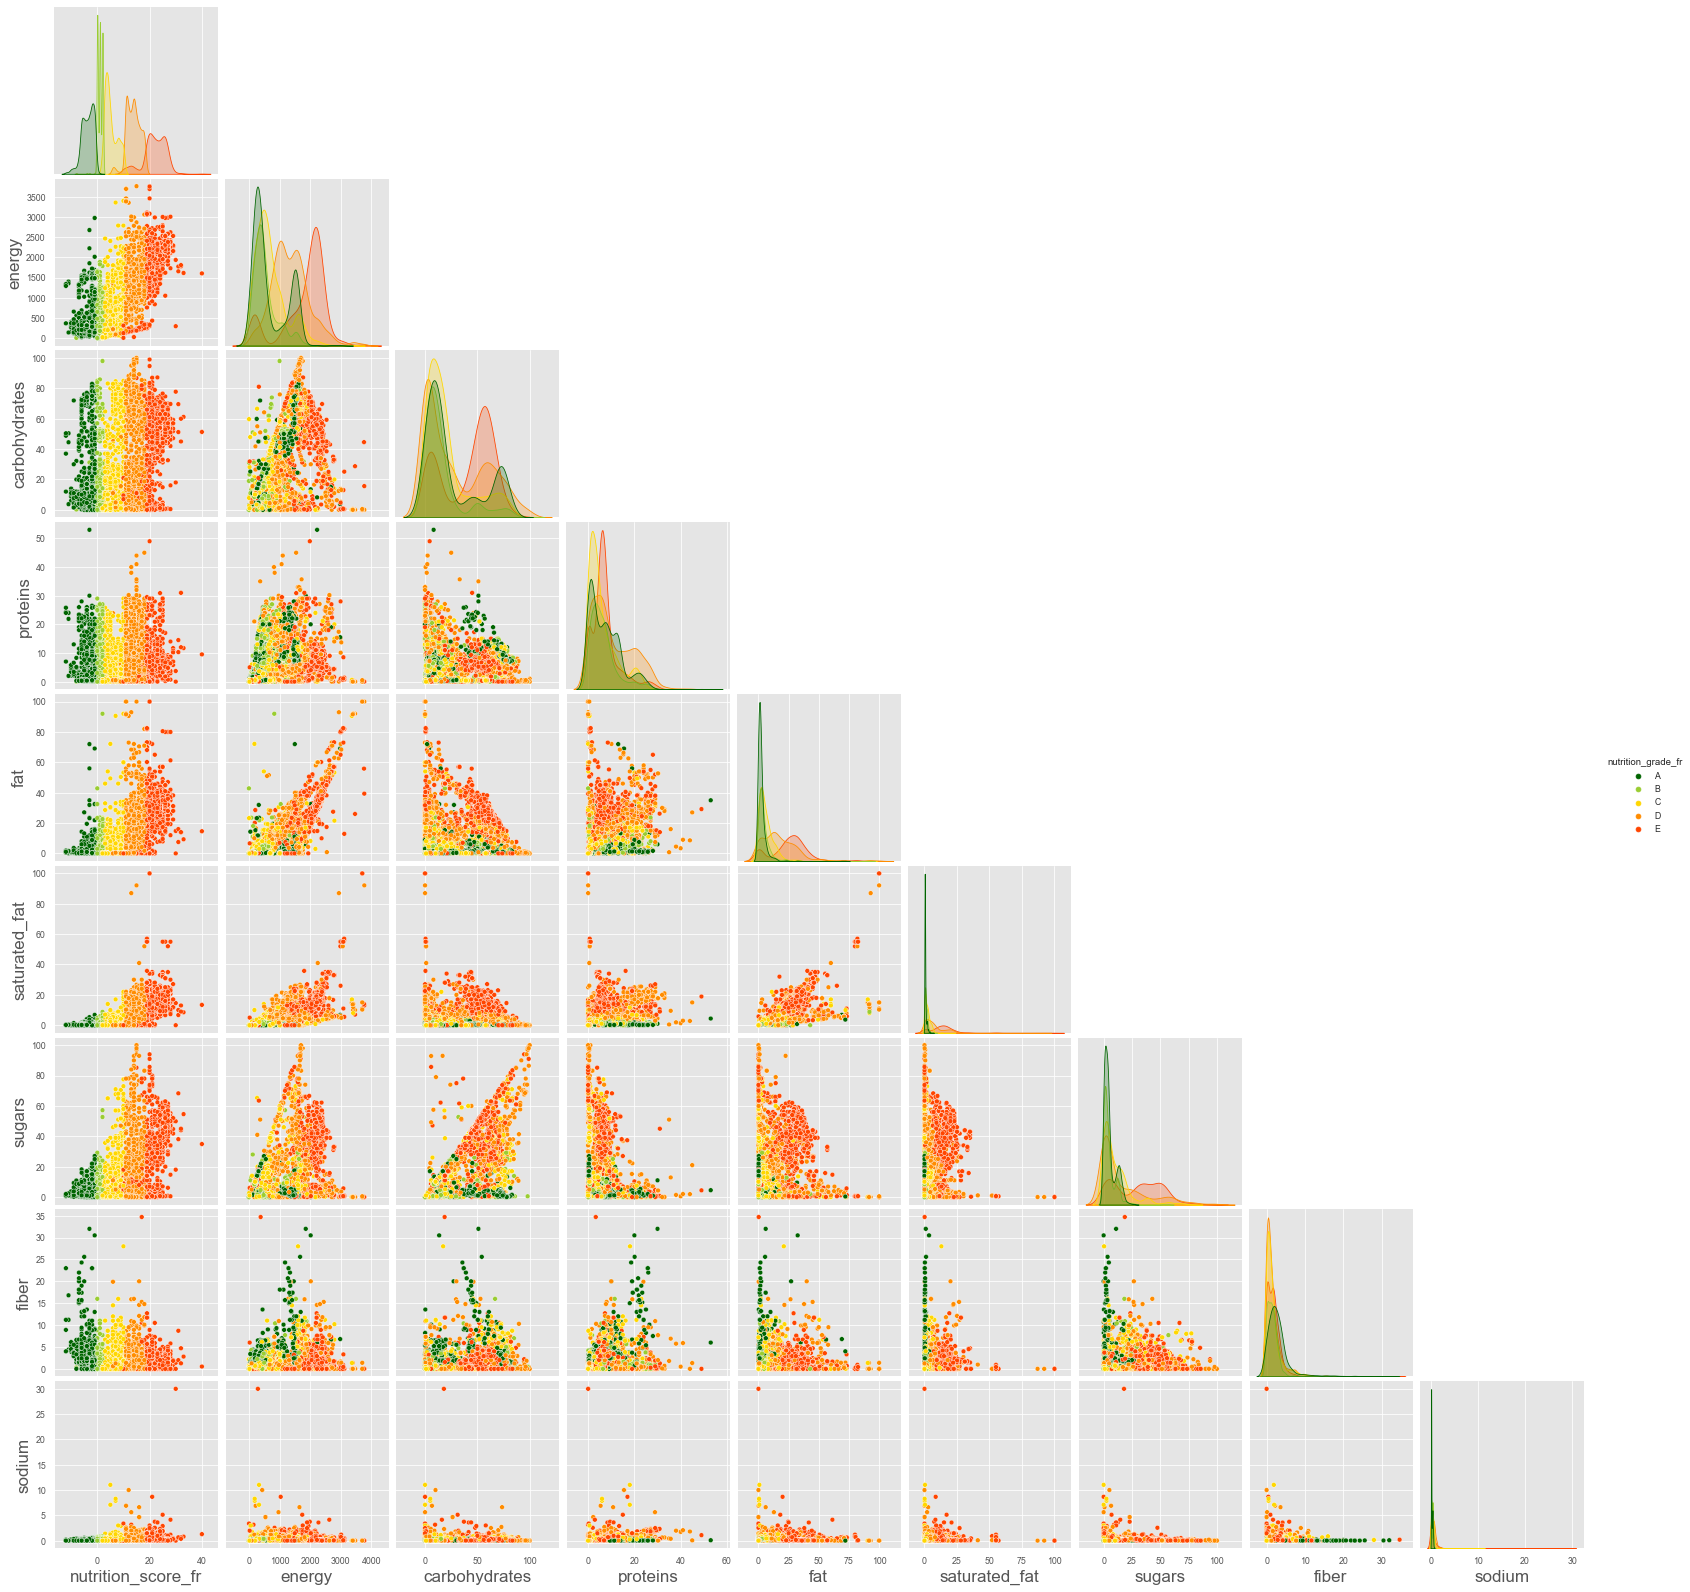

In [25]:
# Matrice de correlation par scores obtenus
num.append('nutrition_grade_fr')
sns.set_context("paper", rc={"axes.labelsize":17})
sns.color_palette(color)
plt.figure(figsize=(10, 40))
sns.pairplot(data[num].head(5000),corner=True,palette=labelcolor,hue="nutrition_grade_fr", hue_order=['A','B','C','D','E'])
num.remove('nutrition_grade_fr')

**NOTE** : *Pour la ligne nutriscore, on distingue une courbe croissante pour les sucres, acides gras saturés, lipides, glucides et energie, ce qui signifie qu'il existe une **corrélation, même partielle**, entre ces valeurs nutritionnelles et le nutriscore. Les courbes (donc **corrélations) les plus fines et marquées** sont entre les lipides et acides gras saturés, lipide et energie, acides gras saturés et energie, sucre et glucides, sucre et energie et glucide et energie. À l'inverse, les variables n'ayant **à fortiori aucune relation** sont les proteines et les glucides, fibre et energie. On remarque également une **corrélation négative** entre sodium et fibre et protéine et sucre.*

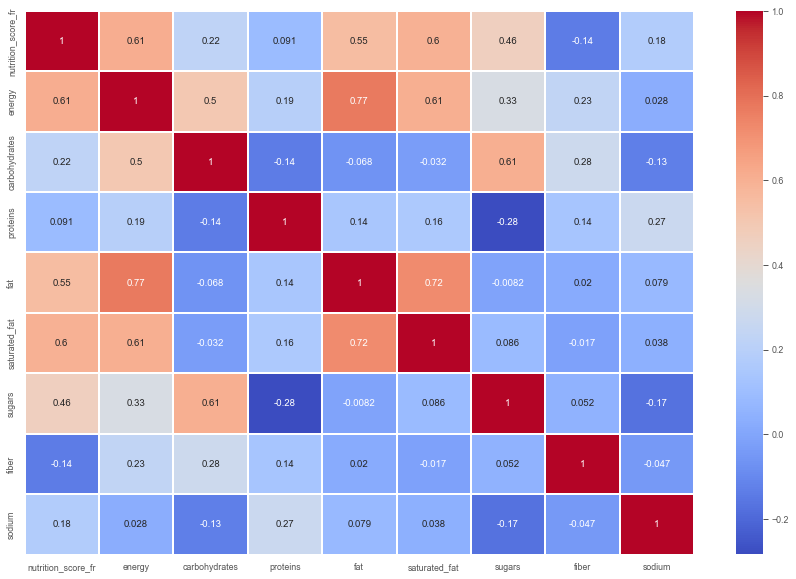

In [26]:
# Matrice de corrélation
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(),annot=True,linewidths=2,cmap="coolwarm");

**NOTE** : *Cette matrice de corrélation permet d'affirmer les observations précédentes et de retrouver visuellement les **corrélations les plus fortes**, à savoir entre les lipides et l'énergie, ce qui est logique puisqu'on compte 9kCal pour 1g de lipide vs 4kCal pour 1g de glucide ou protéines. Également l'acide gras saturé et les lipides puisque les acides gras sont de la famille des lipides. Pour la même raison les sucre et les glucides sont corrélés. On doit cependant infirmer l'hypothèse selon laquelle le sodium et le sucre sont corrélés négativement. **La corrélation négative la plus forte** (bien que non significative) concerne le sucre et les protéines, et pourrait s'expliquer par le fait que le sucre est peu présent dans les plats en France, et les protéines qui proviennent principalement de viandes, poissons et légumes, sont consommés en plat salés.*

# 3. Analyse Multivariée

## 3.1 ACP

In [27]:
X = data.select_dtypes(['float64','int32']).values

**NOTE** : *Les lignes ci-dessus serviront plus tard à représenter graphiquement.*

In [28]:
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

**NOTE** : *Je vais ici utiliser l'ACP afin de trouver des caractéristiques communes aux produits en les projetant sur plusieurs dimensions 2 à 2. Pour ce faire, il faut tout d'abord centrer les données (X_scaled).*

In [29]:
n_comp = X.shape[1]
pca = PCA(n_components = n_comp)

**NOTE** : *On choisit ensuite le nombre de composants ou dimensions pour l'ACP. On prendra ici autant de dimensions que de variables numériques afin de représenter graphiquement l'explication de la variabilité des individus pour chaque dimension.*

In [30]:
X_projected = pca.fit_transform(X_scaled)
pcs = pca.components_

**NOTE** : *Enfin on crée 2 tableaux de données centrées. Ils contiennent les valeurs des variables numériques et des produits pour chaque dimension.*

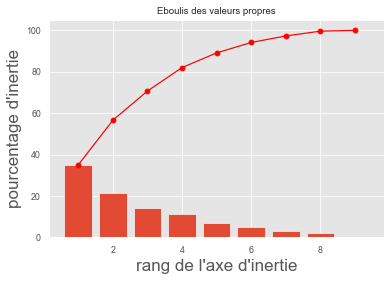

In [31]:
# Eboulis des valeurs propres
display_scree_plot(pca)

## Variabilité des individus

In [34]:
# Explication de la variance pour n dimension, affiche le coefficient de corrélation au carré, la somme pour une dimension (=1 ligne) est égale à 1
round(pd.DataFrame(data=pcs*pcs),ndigits=1)

,0,1,2,3,4,5,6,7,8
0,0.2,0.3,0.0,0.0,0.2,0.2,0.1,0.0,0.0
1,0.0,0.0,0.3,0.1,0.1,0.1,0.3,0.0,0.1
2,0.1,0.0,0.1,0.2,0.0,0.0,0.0,0.5,0.0
3,0.1,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.6
4,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.1,0.3
5,0.1,0.2,0.2,0.0,0.1,0.1,0.2,0.2,0.0
6,0.0,0.0,0.1,0.0,0.2,0.6,0.0,0.0,0.0
7,0.5,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0
8,0.0,0.5,0.2,0.0,0.3,0.0,0.0,0.0,0.0


### Aide à l'interprétation des composantes de l'ACP
**Afficher les caractéristiques d'un produit en particulier**

    data.iloc[36366]
    
**Connaitre les valeurs maximales/minimales d'une variables**

    data['nutrition_score_fr'].sort_values(ascending=False).head(50)
    
**Vérifier les valeurs extrèmes**

    df_Xprojected = pd.DataFrame(X_projected)
    extreme_values = df_Xprojected[df_Xprojected[2] < -1].index.tolist()
    data[data.index.isin(extreme_values)]

In [35]:
colonne_pca = data.select_dtypes(['float64','int32']).columns
index_pca = data.select_dtypes(['float64','int32']).index
categories_ACP = [data.categories_ACP]

**NOTE** : *Les lignes ci-dessus servent à représenter graphiquement les catégories par coloris et les noms des variables au bout de chaque vecteurs.*

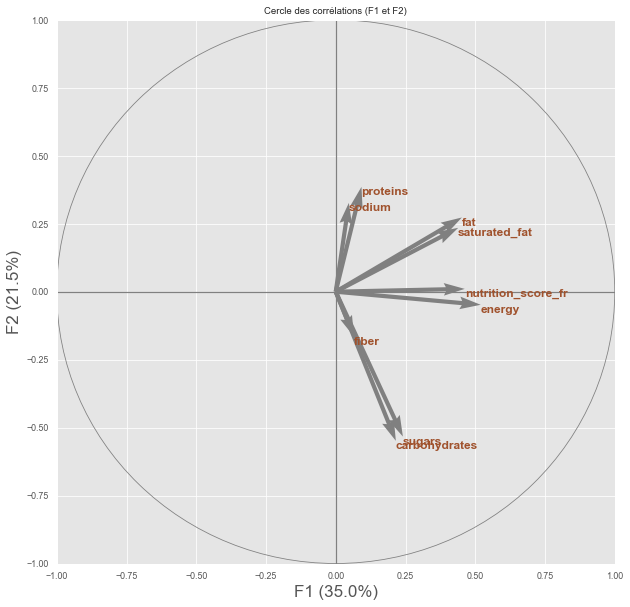

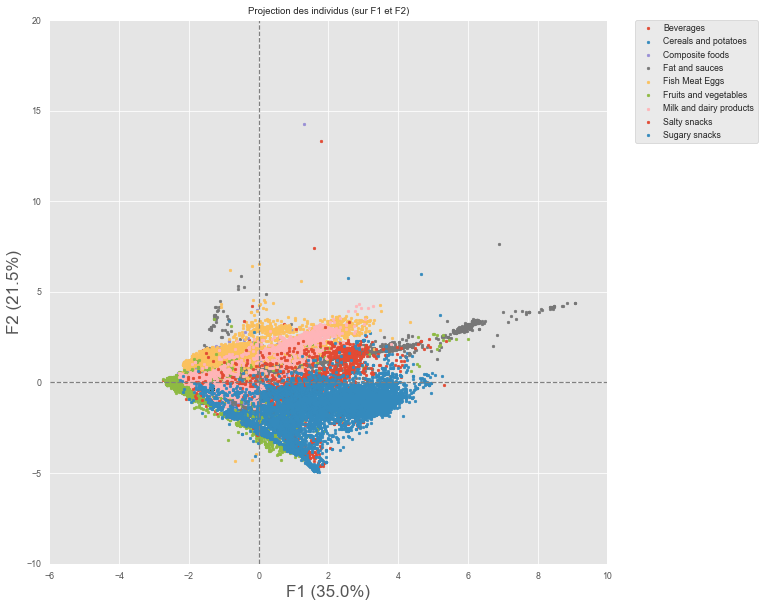

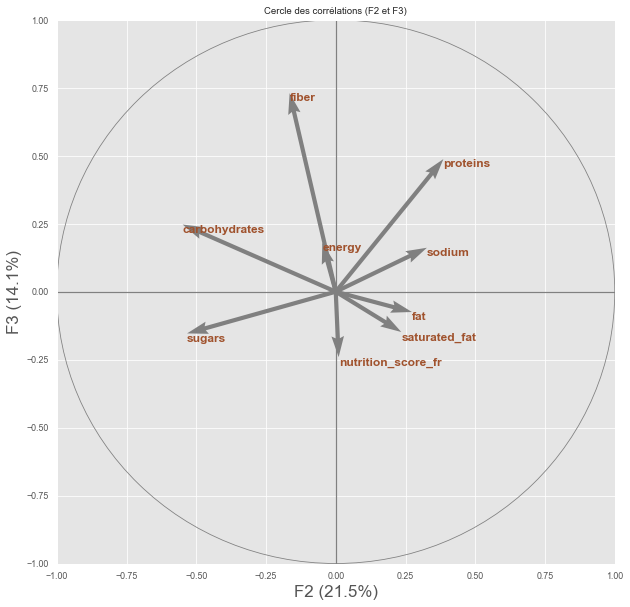

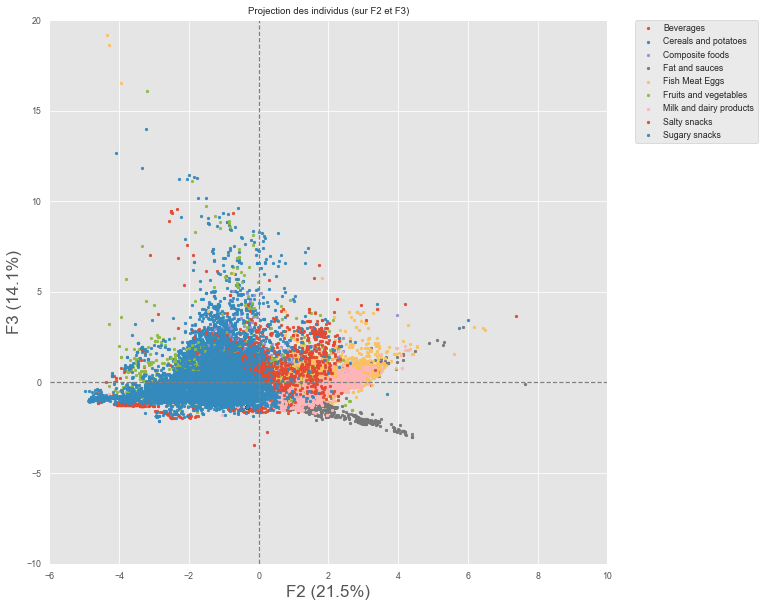

In [36]:
#Afficher les différentes composantes pour représenter 75% des données
for i in range(1,3):
    ax1 = display_circles(pcs, n_comp, pca, [(i-1,i)], labels = np.array(colonne_pca))
    ax2 = display_factorial_planes(X_projected, n_comp, pca, [(i-1,i)],illustrative_var=categories_ACP,lims=(-6,10,-10,20))  
sns.set(font_scale=1)

**F1** : *Lorsqu'on représente graphiquement les données, on voit que la première dimension F1 représente la richesse nutritive des produits. Un produit proche de 0 ne sera donc composé quasiment que d'eau. À l'inverse les produits composés principalement de lipides sont surreprésentés sur cette dimension puisque les lipides sont plus riches en energie.*

**F2** : *En s'approchant des valeurs extrèmes, on voit que F2 représente graphiquement les produits salés mangés en plats. Les produits sucrés consommés en desserts ou en snacks sont donc naturellement anti-corrélés sur le graphique.*

**F3** : *Cette troisième dimension agglomère les produits contenant beaucoup de fibres et de protéines, que l'on peut associer aux légumineuses et féculents protéinés (ex: champignons). À l'inverse les produits en dessous de 0 sur la dimension sont souvent mauvais pour la santé.*